In [12]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

df = pd.read_csv("./results/matmul2d_512-2048.csv")
pd.options.display.max_rows = 999
df.drop(["k", "n", "grid_size"], inplace=True, axis=1)
df

,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inference_time_avg,trace_time,offloading_time_in0,offloading_time_in1,TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,245.82,0.00,25618.31,24201.15,1.09,0.83%,0.61%
1,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,284.72,0.00,103323.46,103127.72,7.54,5.75%,4.19%
2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,399.62,0.00,383295.54,382098.20,42.99,32.80%,23.85%
3,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,247.24,0.00,26681.90,26700.97,1.09,1.66%,1.20%
4,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,256.51,0.00,101364.85,100510.60,8.37,12.77%,9.29%
5,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,673.96,0.00,391957.52,387939.93,25.49,38.90%,28.29%
6,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT8_B,MathFidelity.HiFi2,248.26,0.00,145332.57,136653.18,1.08,0.82%,0.60%
7,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT8_B,MathFidelity.HiFi2,246.82,0.00,532678.60,539278.98,8.70,6.64%,4.83%
8,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT8_B,MathFidelity.HiFi2,355.05,0.00,2154314.28,2146567.58,48.39,36.92%,26.85%
9,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT8_B,MathFidelity.LoFi,250.10,0.00,157996.42,141384.36,1.07,0.41%,0.30%


In [13]:
# Give name to configurations
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
confs = list()
for i in range(n_confs):
    for _ in unq_m:
        confs.append(f"conf_{i}")

df['conf'] = confs

In [14]:
d_name = "inference_time_avg"

c_name = 'use_trace'

data = dict()
c_list = df[c_name].unique()
for c in c_list:
    data[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)][d_name].values.mean()
        data[c].append(val0)

df_inf_use_trace = pd.DataFrame.from_dict(data)
df_inf_use_trace.set_index(unq_m, inplace=True)
df_inf_use_trace.columns = ["No trace", "Trace"]
df_inf_use_trace

,No trace,Trace
512,248.890,24.666
1024,257.658,64.150
2048,385.260,357.136


In [17]:
c_name = 'use_trace'

data = dict()
c_list = df[c_name].unique()
for c in c_list:
    data[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)][d_name].values.mean()
        val1 = df.loc[(df['m'] == m) & (df[c_name] == c)]['trace_time'].values.mean()
        data[c].append(val0 + val1)

df_inf_use_trace_w_trace_time = pd.DataFrame.from_dict(data)
df_inf_use_trace_w_trace_time.set_index(unq_m, inplace=True)
df_inf_use_trace_w_trace_time.columns = ["No trace", "Trace"]
df_inf_use_trace_w_trace_time

,No trace,Trace
512,248.890,32340.064
1024,257.658,32175.174
2048,385.260,32333.024


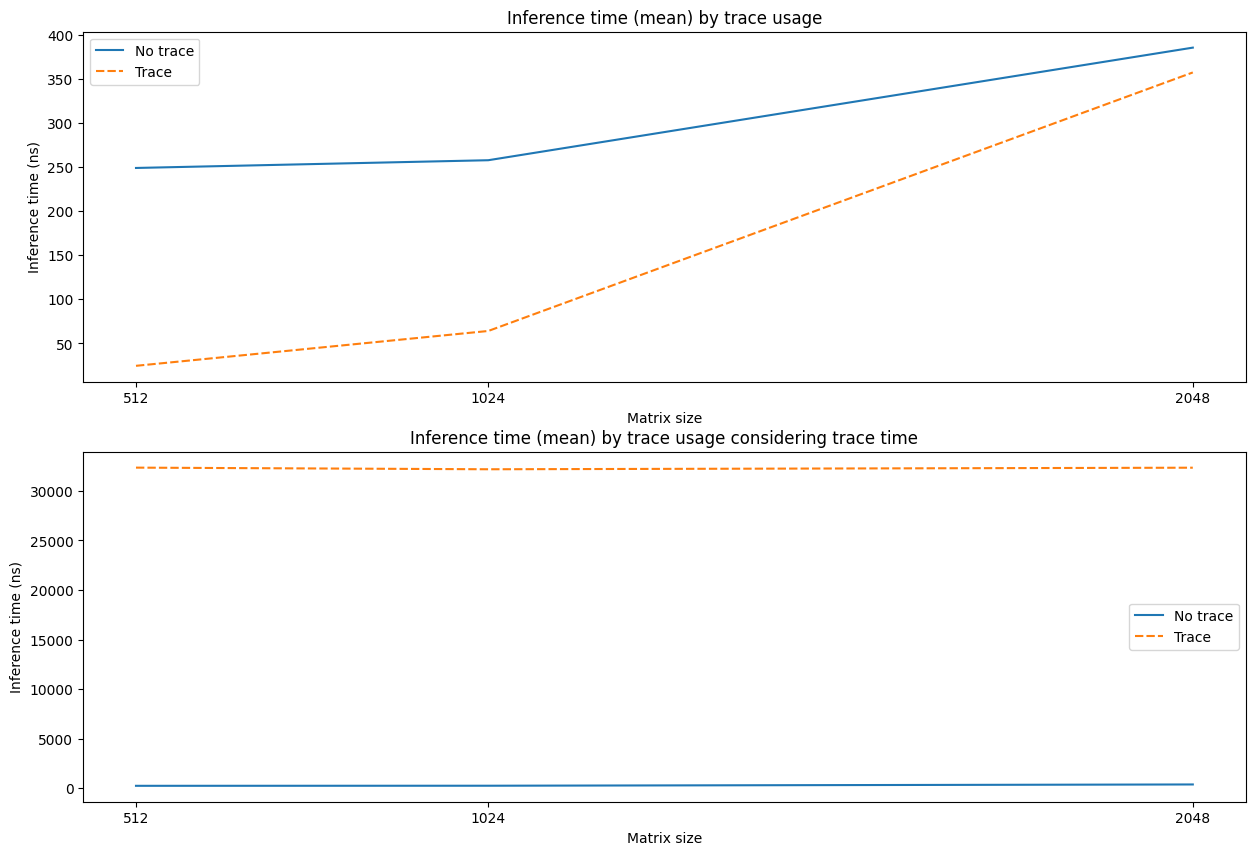

In [16]:
fig, ax = plt.subplots(2, figsize=(15,10))

plot = sns.lineplot(df_inf_use_trace, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by trace usage")

plot = sns.lineplot(df_inf_use_trace_w_trace_time, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by trace usage considering trace time")

plt.show()